# Figure 4 - Comparison of models

### Set-up

In [1]:
import cobra, libsbml, collections, math
import pandas as pd
from cobrafunctions.buildingediting import *
from cobrafunctions.analysing import *
from cobrafunctions.adjustedcobrafunctions import *
from tqdm import tqdm_notebook as tqdm

savelocation, inputlocation = nameexperiment("figure4") # Set name for files

model = cobra.io.sbml.read_sbml_model("Inputs/4_stage_GC.xml")

model = constrainmaintenance(model) #add maintenance

cobra\__init__.py:33 FutureWarning: Python 2 is reaching end of life (see https://www.python.org/dev/peps/pep-0373/) and many cobra dependencies have already dropped support. At the moment it *should* still work but we will no longer actively maintain Python 2 support.


This experiment already exists, continue and overwrite?y
OK, Continuing and overwriting experiment


No handlers could be found for logger "cobra.io.sbml"


### Run 'realistic' constraints with no aperture constraint

In [2]:
realisticmodel = model.copy()

In [3]:
constraints = [124, 454, 200, 200, 200, 464]
scalingfactor = 1.2
osmolytestoconstrain = ["Cl", "K", "SUCROSE", "FRU", "GLC", "MAL"]
osmolarity = ((((2.5*math.exp(0.16*(17)))*((((17)*200+4000)*17.2*10**-8)-((33*(10**-6))+(565*(10**3)*(0)))))/(0.082*293))*10**3)
totalosmo = 0
for i, osmolyte in enumerate(osmolytestoconstrain):
    if osmolyte == "MAL":
        setflux(realisticmodel, osmolyte + "_c_gc_Linker", 0, (constraints[i]*scalingfactor)*(6*200+4000)*17.2*(10.0**(-8.0))*0.1, multi = True) #constrain max cytosolic chloride
        setflux(realisticmodel, osmolyte + "_v_gc_Linker", 0, (constraints[i]*scalingfactor)*(6*200+4000)*17.2*(10.0**(-8.0))*0.9*0.7, multi = True) #constrain max cytosolic chloride
        setflux(realisticmodel, "a" + osmolyte + "_v_gc_Linker", 0, (constraints[i]*scalingfactor)*(6*200+4000)*17.2*(10.0**(-8.0))*0.9*0.3, multi = True) #constrain max cytosolic chloride
        setflux(realisticmodel, osmolyte + "_c_gc_Linker_2", 0, (constraints[i]*scalingfactor)*(17*200+4000)*17.2*(10.0**(-8.0))*0.1, multi = False) #constrain max cytosolic chloride
        setflux(realisticmodel, osmolyte + "_v_gc_Linker_2", 0, (constraints[i]*scalingfactor)*(17*200+4000)*17.2*(10.0**(-8.0))*0.9*0.7, multi = False) #constrain max cytosolic chloride
        setflux(realisticmodel, "a" + osmolyte + "_v_gc_Linker_2", 0, (constraints[i]*scalingfactor)*(17*200+4000)*17.2*(10.0**(-8.0))*0.9*0.3, multi = False) #constrain max cytosolic chloride
    else:
        setflux(realisticmodel, osmolyte + "_c_gc_Linker", 0, (constraints[i]*scalingfactor)*(6*200+4000)*17.2*(10.0**(-8.0))*0.1, multi = True) #constrain max cytosolic chloride
        setflux(realisticmodel, osmolyte + "_v_gc_Linker", 0, (constraints[i]*scalingfactor)*(6*200+4000)*17.2*(10.0**(-8.0))*0.9, multi = True) #constrain max cytosolic chloride
        setflux(realisticmodel, osmolyte + "_c_gc_Linker_2", 0, (constraints[i]*scalingfactor)*(17*200+4000)*17.2*(10.0**(-8.0))*0.1, multi = False) #constrain max cytosolic chloride
        setflux(realisticmodel, osmolyte + "_v_gc_Linker_2", 0, (constraints[i]*scalingfactor)*(17*200+4000)*17.2*(10.0**(-8.0))*0.9, multi = False) #constrain max cytosolic chloride
    print "Max " + osmolyte + " constrained to " + str(round(constraints[i]*10**(-3)*1.1, 3)) + "M (" + str(round((constraints[i])*(17*200+4000)*17.2*(10.0**(-8.0)),3)) + "), " + str(round(constraints[i]*10**(-3)/osmolarity*100)) + "% of total osmolarity required" 
    totalosmo = totalosmo + constraints[i]*scalingfactor*10**(-3)
print "Constraints can account for %s percent of total osmolarity" % (round(totalosmo/osmolarity*100,))

Max Cl constrained to 0.136M (0.158), 6.0% of total osmolarity required
Max K constrained to 0.499M (0.578), 23.0% of total osmolarity required
Max SUCROSE constrained to 0.22M (0.255), 10.0% of total osmolarity required
Max FRU constrained to 0.22M (0.255), 10.0% of total osmolarity required
Max GLC constrained to 0.22M (0.255), 10.0% of total osmolarity required
Max MAL constrained to 0.51M (0.591), 24.0% of total osmolarity required
Constraints can account for 101.0 percent of total osmolarity


Running pFBA
Setting SOF model
Running FVA



Processing results


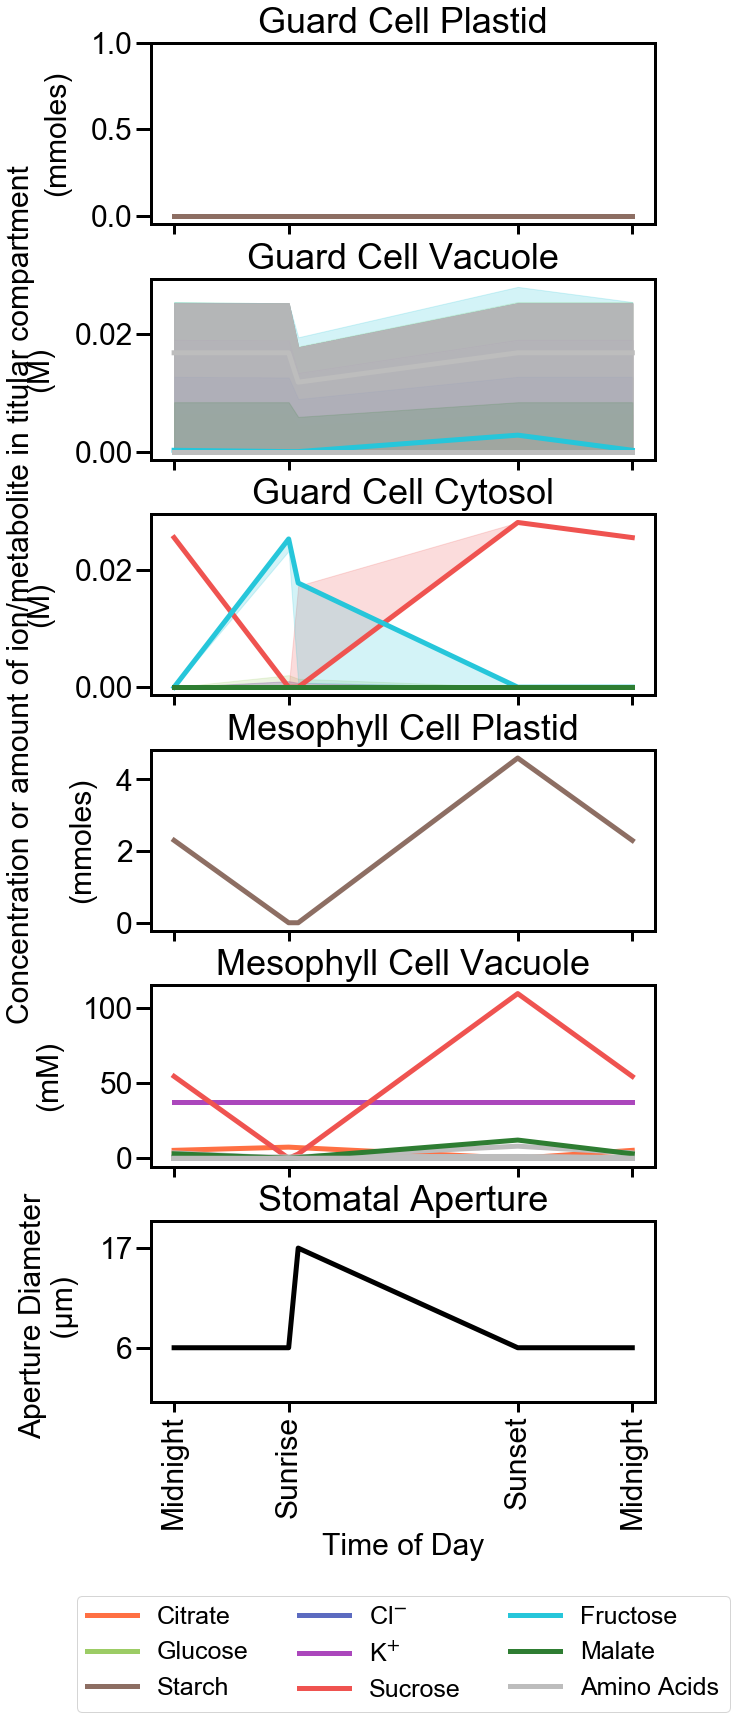

In [4]:
realisticmodelnoaperture, realisticmodelfig = linkersplotfrommodel(realisticmodel)

In [5]:
realisticnoaperturesolution = getphloemoutput(realisticmodelnoaperture)

### Run realistic constraints with no aperture constraint and starch constrained to 0

In [6]:
starchknockoutmodel = realisticmodel.copy()

In [7]:
setflux(starchknockoutmodel, "STARCH_p_gc_Linker", 0, 0, multi = True)

Name,TomCoreOxford
Memory address,0x022b069b0
Number of metabolites,6394
Number of reactions,7061
Number of groups,0
Objective expression,0
Compartments,"a, p_me, Cytoplasm, Biomass, Extracellular, Mitochondrion innermembrane interacting with inter membrane space, Mitochondrial intermembrane space, Mitochondrion innermembrane interacting with cristal space, v_gc, Mitochondrion, Thylakoid, c_gc, v_me, c_me, Plastid, Endoplasmic reticulum, Pool, Vacuole, Peroxisome, p_gc, pseudo"


Running pFBA
Setting SOF model
Running FVA



Processing results


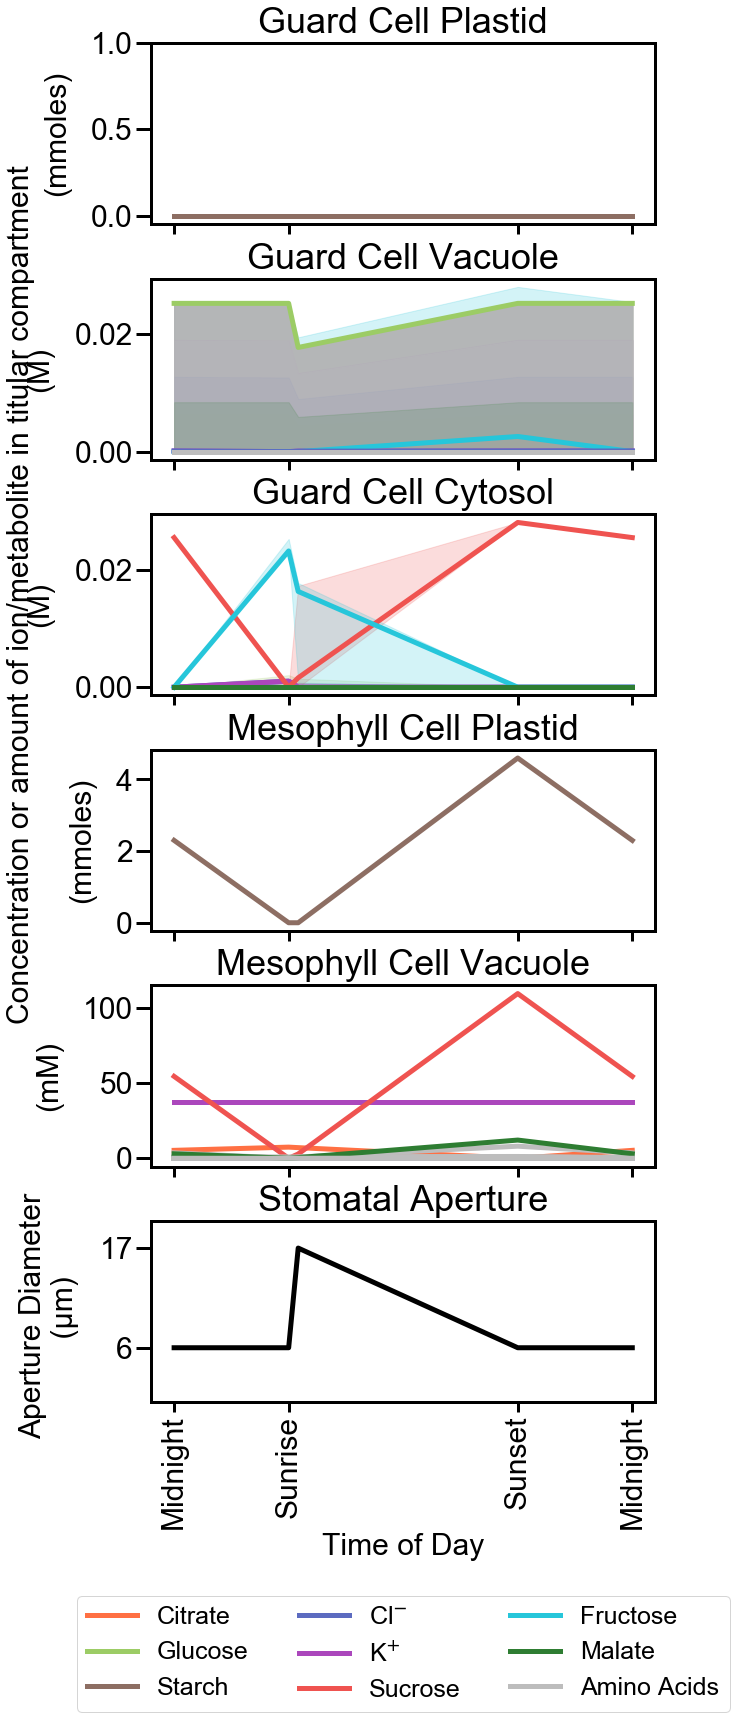

In [8]:
starchknockoutmodelnoaperture, starchknockoutmodelfig = linkersplotfrommodel(starchknockoutmodel, "starchknockoutnoaperture")

In [9]:
starchknockoutnoaperturesolution = getphloemoutput(starchknockoutmodelnoaperture)

### Run 'realistic' constraints with aperture constraint

In [10]:
apertureconstraint = [6,17,6,6]
realisticmodel = constrainaperture(realisticmodel, apertureconstraint) #constrain open aperture
print "Aperture constrained to:" + str(apertureconstraint)

Aperture constrained to:[6, 17, 6, 6]


Running pFBA
Setting SOF model
Running FVA



Processing results


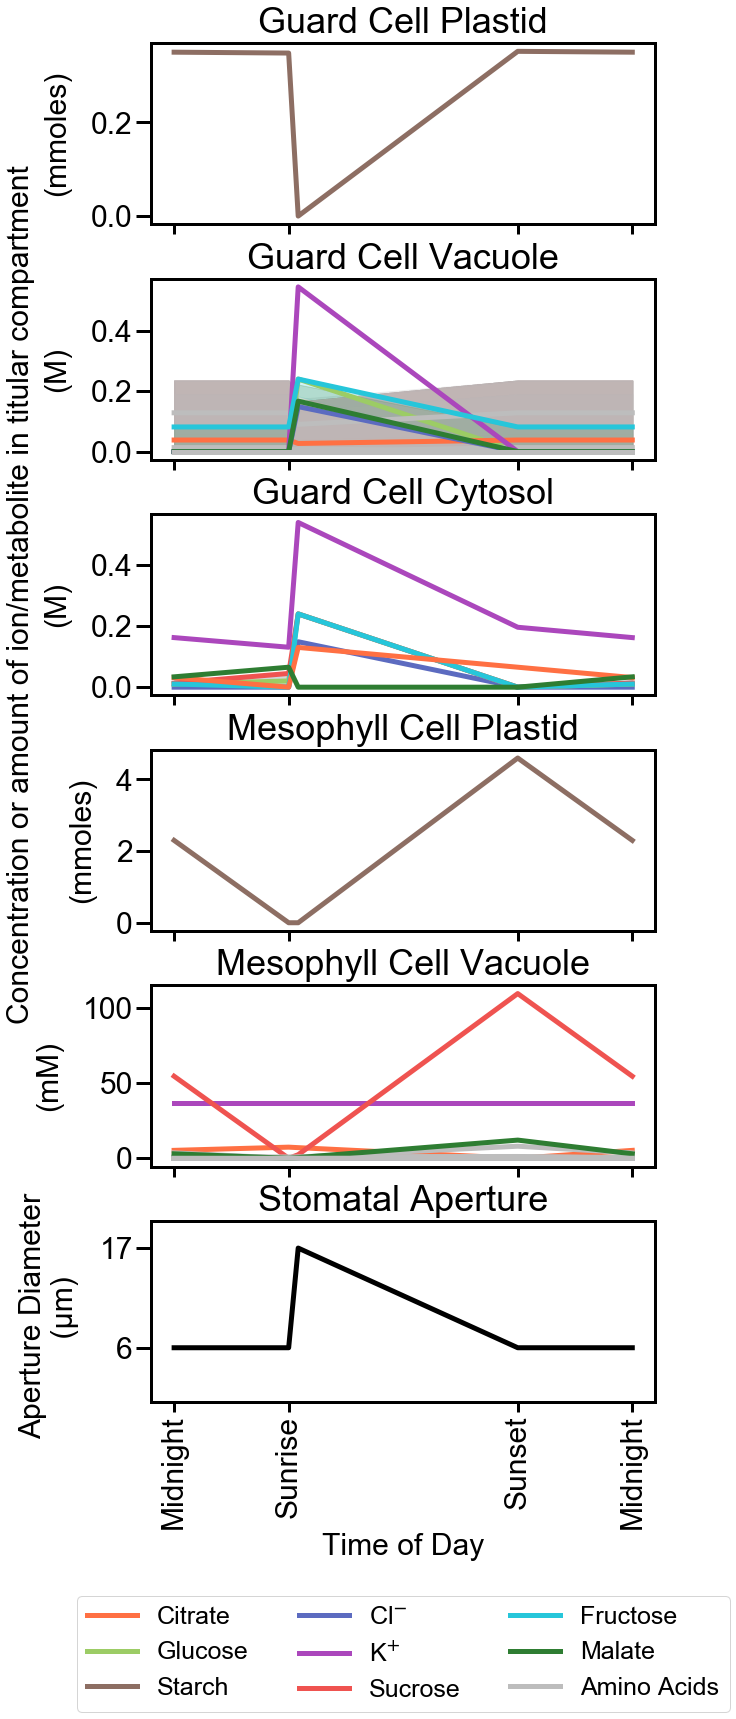

In [11]:
realisticmodel, realisticmodelfig = linkersplotfrommodel(realisticmodel, "realisticmodelaperture")

In [12]:
realisticaperturesolution = getphloemoutput(realisticmodel)

### Run realistic constraints with aperture constraint and starch constrained to 0

In [13]:
starchknockoutmodel = realisticmodel.copy()

In [14]:
setflux(starchknockoutmodel, "STARCH_p_gc_Linker", 0, 0, multi = True)

Name,TomCoreOxford
Memory address,0x03eb14b00
Number of metabolites,6394
Number of reactions,7061
Number of groups,0
Objective expression,0
Compartments,"a, p_me, Cytoplasm, Biomass, Extracellular, Mitochondrion innermembrane interacting with inter membrane space, Mitochondrial intermembrane space, Mitochondrion innermembrane interacting with cristal space, v_gc, Mitochondrion, Thylakoid, c_gc, v_me, c_me, Plastid, Endoplasmic reticulum, Pool, Vacuole, Peroxisome, p_gc, pseudo"


Running pFBA
Setting SOF model
Running FVA



Processing results


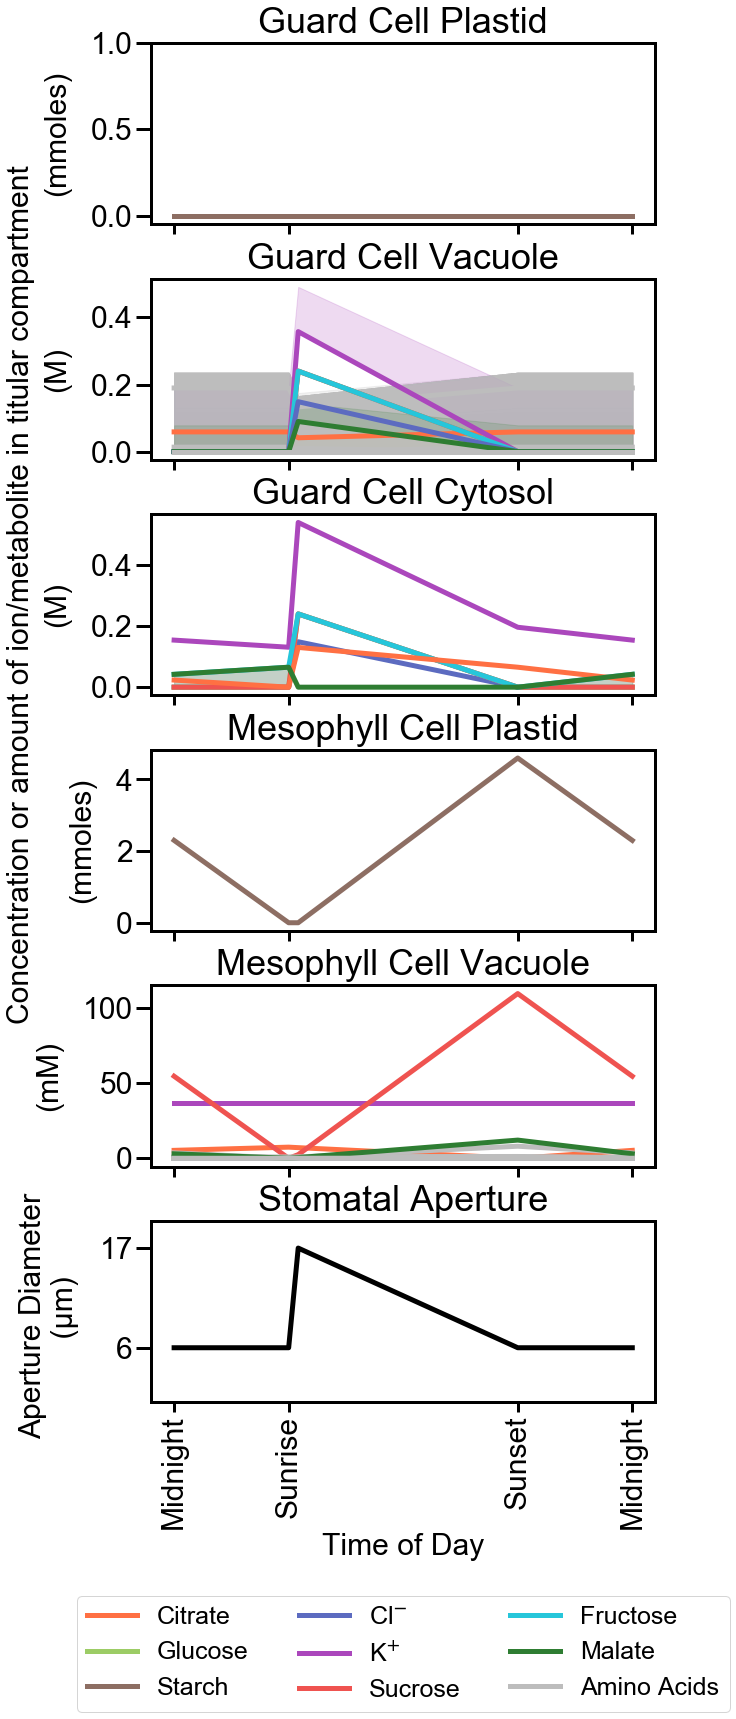

In [15]:
starchknockoutmodel, starchknockoutmodelfig = linkersplotfrommodel(starchknockoutmodel)

In [16]:
starchknockoutaperturesolution = getphloemoutput(starchknockoutmodel)

In [17]:
#find which osmolyte maxima are limiting
limitlist = []
for i in ["Cl", "K", "SUCROSE", "GLC", "FRU", "MAL"]:
    limitlist.append(i + "_c_gc_Linker_2")
    limitlist.append(i + "_v_gc_Linker_2")

for reaction in limitlist:
    print reaction, starchknockoutmodel.reactions.get_by_id(reaction).flux,starchknockoutmodel.reactions.get_by_id(reaction).upper_bound
    if starchknockoutmodel.reactions.get_by_id(reaction).flux - starchknockoutmodel.reactions.get_by_id(reaction).upper_bound == 0:
        print reaction + " is limiting"

Cl_c_gc_Linker_2 0.018939264 0.018939264
Cl_v_gc_Linker_2 0.170453376 0.170453376
Cl_v_gc_Linker_2 is limiting
K_c_gc_Linker_2 0.0686757042469 0.069342144
K_v_gc_Linker_2 0.409615037304 0.624079296
SUCROSE_c_gc_Linker_2 0.0305472 0.0305472
SUCROSE_v_gc_Linker_2 0.2749248 0.2749248
SUCROSE_v_gc_Linker_2 is limiting
GLC_c_gc_Linker_2 0.0305472 0.0305472
GLC_v_gc_Linker_2 0.2749248 0.2749248
GLC_v_gc_Linker_2 is limiting
FRU_c_gc_Linker_2 0.0305472 0.0305472
FRU_v_gc_Linker_2 0.2749248 0.2749248
FRU_v_gc_Linker_2 is limiting
MAL_c_gc_Linker_2 0.0 0.070869504
MAL_v_gc_Linker_2 0.102895133353 0.4464778752


### Comparing +Starch and -Starch Efficiency

In [18]:
100-((realisticnoaperturesolution-realisticaperturesolution)/(starchknockoutnoaperturesolution-starchknockoutaperturesolution)*100)

5.895639445294378

Therefore a starch knockout is 5.9% less efficient

In [19]:
100/94.1

1.0626992561105209

# Figure 4

In [20]:
def comparelinkers(modellist, savelocation, coloursdict = "", name=None):

    '''
    This function will return a matplotlib figure containing plots of osmolytes over the diel cycle for a series of models.
    It takes as an argument a list of unoptimised models, a location to save the figure, an optional dictionary of colours
    for the lines and an optional name for the figure. The defaults for the latter two are as described in plotlinkers.
    '''

    reactionsdflist = []
    for model in modellist:
        gclinkers = []
        for reaction in model.reactions:
            if "gc_Linker" in reaction.id:
                gclinkers.append(reaction)
        model, solution = FBA_FVA_run(model, obj = "Phloem_tx_overall", rxnlist = gclinkers)
        reactionsdf = pd.DataFrame(columns = ["pfba", "minimum", "maximum"])
        for reaction in tqdm(model.reactions):
            try:
                reactionsdf.loc[reaction.id] = [reaction.flux, model.fva["minimum"][reaction.id], model.fva["maximum"][reaction.id]]
            except:
                reactionsdf.loc[reaction.id] = [reaction.flux, reaction.flux, reaction.flux]
        reactionsdflist.append(reactionsdf)

    import itertools

    def flip(items, ncol):
        return itertools.chain(*[items[i::ncol] for i in range(ncol)])

    reactionsdictlist = []
    for reactionsdf in reactionsdflist:
        reactionsdict = {}
        for reaction, row in reactionsdf.iterrows():
            if reaction.__contains__("Linker"):
                if "_a_" not in reaction:
                    try:
                        reactionsdict[reaction[-13:-9]][reaction[:-14]][int(reaction[-1:])] = (row["pfba"], row["minimum"], row["maximum"])
                    except:
                        try:
                            reactionsdict[reaction[-13:-9]][reaction[:-14]] = {}
                            reactionsdict[reaction[-13:-9]][reaction[:-14]][int(reaction[-1:])] = (row["pfba"], row["minimum"], row["maximum"])
                        except:
                            reactionsdict[reaction[-13:-9]] = {}
                            reactionsdict[reaction[-13:-9]][reaction[:-14]] = {}
                            reactionsdict[reaction[-13:-9]][reaction[:-14]][int(reaction[-1:])] = (row["pfba"], row["minimum"], row["maximum"])
        reactionsdictlist.append(reactionsdict)

    if coloursdict == "":
        coloursdict = {
            'Cl': '#5C6BC0',
            'STARCH':'#8D6E63' ,
            'K': '#AB47BC',
            'MAL': '#2E7D32',
            'SUCROSE': '#EF5350',
            'CIT': '#FF7043',
            'FRU': '#26C6DA',
            'GLC': '#9CCC65',
            'Other': '#BDBDBD',
         }
    coloursdict = collections.OrderedDict(sorted(coloursdict.items()))

    matplotlib.rcParams.update({'font.size': 30})
    matplotlib.rcParams['lines.linewidth'] = 5
    matplotlib.rcParams['axes.linewidth'] = 3
    plt.rcParams["font.family"] = "Arial"

    titlelist = ["Guard Cell Plastid", "Guard Cell Vacuole", "Guard Cell Cytoplasm", "Mesophyll Cell Plastid",  "Mesophyll Cell Vacuole"]
    unitslist = ["(mmoles)", "(M)", "(M)", "(mmoles)", "(mM)"]
    complist = ["p_gc", "v_gc", "c_gc", "p_me", "v_me",]

    apertures = [6,17,6,6]
    gcvolume = []
    for i in range(checknumberofmodels(modellist[0])):
        gcvolume.append((apertures[i]*200+4000)*17.2*(10.0**(-8.0)))

    mevolume = 2.5
    v_mevolume = mevolume*0.9

    for index, reactionsdict in enumerate(reactionsdictlist):
        for compartment in ["v_me", "v_gc"]:
            amal = reactionsdict[compartment].pop("aMAL")
            for i in range(1, checknumberofmodels(modellist[index])+1):
                reactionsdict[compartment]["MAL"][i] = reactionsdict[compartment]["MAL"][i] + amal[i]
            acit = reactionsdict[compartment].pop("aCIT")
            for i in range(1, checknumberofmodels(modellist[index])+1):
                reactionsdict[compartment]["CIT"][i] = reactionsdict[compartment]["CIT"][i] + acit[i]
        linkerconcs = reactionsdict.copy()
        for compartment in linkerconcs:
            for reaction in linkerconcs[compartment]:
                for phase in linkerconcs[compartment][reaction]:
                    if "v_me" in compartment:
                        linkerconcs[compartment][reaction][phase] = ((linkerconcs[compartment][reaction][phase][0]*0.001)/v_mevolume*1000, (linkerconcs[compartment][reaction][phase][1]*0.001)/v_mevolume*1000, (linkerconcs[compartment][reaction][phase][2]*0.001)/v_mevolume*1000)
                    elif "v_gc" in compartment:
                        linkerconcs[compartment][reaction][phase] = ((linkerconcs[compartment][reaction][phase][0]*0.001)/(gcvolume[phase-1]*0.9), (linkerconcs[compartment][reaction][phase][1]*0.001)/(gcvolume[phase-1]*0.9), (linkerconcs[compartment][reaction][phase][2]*0.001)/(gcvolume[phase-1]*0.9))
                    elif "c_gc" in compartment:
                        linkerconcs[compartment][reaction][phase] = ((linkerconcs[compartment][reaction][phase][0]*0.001)/(gcvolume[phase-1]*0.1), (linkerconcs[compartment][reaction][phase][1]*0.001)/(gcvolume[phase-1]*0.1), (linkerconcs[compartment][reaction][phase][2]*0.001)/(gcvolume[phase-1]*0.1))
        reactionsdict = linkerconcs


    legendset = set()

    fig, axs = plt.subplots(6,len(modellist),figsize=(20, 25), sharex = True, sharey = 'row')
    i=0
    j=0
    c=0

    phaseconversion = [0,6,6.5,18,24]

    nonzerolist = []
    for reactionsdict in reactionsdictlist:
        for compartment in complist:
            nonzero = False
            m = 0
            for reaction in reactionsdict[compartment]:
                try:
                    colour = coloursdict[reaction]
                except:
                    colour = coloursdict['Other']
                x = phaseconversion
                y0 = []
                y1 = []
                y2 = []
                for phase in reactionsdict[compartment][reaction].values():
                    y0.append(phase[0])
                    y1.append(phase[1])
                    y2.append(phase[2])

                y0.insert(0, reactionsdict[compartment][reaction][4][0])
                y1.insert(0, reactionsdict[compartment][reaction][4][1])
                y2.insert(0, reactionsdict[compartment][reaction][4][2])
                if max(y2) > 0.001 and ("c_gc" in compartment or "v_gc" in compartment) or max(y2) > 0.0001 and "c_gc" not in compartment and "v_gc" not in compartment:
                    if "sum" not in reaction:
                        axs[i][j].plot(x,y0, color = colour,)
                        axs[i][j].fill_between(x, y1, y2, color = colour, alpha = 0.2)
                        axs[i][j].tick_params(axis='y', which='major',length = 15, width = 3)
                        axs[i][j].tick_params(axis='x', which='major',length = 10, width = 3)
                        legendset.add(reaction)
                        nonzero = True
                else:
                    axs[i][j].plot(x,[0,0,0,0,0], color = colour,)
                    axs[i][j].tick_params(axis='y', which='major',length = 15, width = 3)
                    axs[i][j].tick_params(axis='x', which='major',length = 10, width = 3)
                m += 1
            if j == 0:
                axs[i][j].set_ylabel(unitslist[c], labelpad = 20)
                axs[i][j].set_title(titlelist[c], pad = 15, x = 1.1, ha = "center",)
                axs[i][j].tick_params(axis='y', which='major')
                nonzerolist.append(nonzero)
            elif nonzerolist[i] == False:
                nonzerolist[i] = nonzero

            c += 1
            i += 1
            if i == 5:
                osmolarity = [0.234091748752047, 1.9583538166251, 0.234091748752047, 0.23409174875204702]
                aperture = [6,6,17,6,6]
                axs[i][j].plot(phaseconversion, aperture, color = 'black')
                if j == 0:
                    axs[i][j].set_ylabel(u"Aperture Diameter \n (\u03bcm)", labelpad = 30, size = 30)
                    axs[i][j].set_title("Stomatal Aperture", pad = 15, x = 1.1, ha = "center",)
                axs[i][j].set_yticks([6,17])
                axs[i][j].set_xticks([0,6,18,24])
                axs[i][j].set_xticklabels(["Midnight", "Sunrise", "Sunset", "Midnight",], rotation = 90)
                axs[i][j].set_ylim(0,20)
                axs[i][j].set_xlabel("Time of Day")
                axs[i][j].tick_params(axis='y', which='major',length = 15, width = 3)
                axs[i][j].tick_params(axis='x', which='major',length = 10, width = 3)
                j = 1
                c = 0
                i = 0

    for index, lim in enumerate(nonzerolist):
        if lim == False:
            axs[index][j].set_ylim(-0.05, 1)


    fig.subplots_adjust(hspace=0.4, wspace = 0.1, left=0.2, )

    namesdict = {
        "CIT" : "Citrate",
        "Cl" : r"Cl$^{-}$",
        "STARCH" : "Starch",
        "K" : r"K$^{+}$",
        "MAL" : "Malate",
        "GLC" : "Glucose",
        "FRU" : "Fructose",
        "SUCROSE" : "Sucrose"
    }

    from matplotlib.lines import Line2D
    legendlist = sorted(legendset)
    legendlines = []
    legendnames = []
    for reaction in legendlist:
        includeother = False
        try:
            legendlines.append(Line2D([0], [0], color=coloursdict[reaction]))
            legendnames.append(namesdict[reaction])
        except:
            includeother = True
    if includeother == True:
        legendnames.append("Amino Acids")
        legendlines.append(Line2D([0], [0], color='#BDBDBD'))

    axs[0][0].text(0.5, 1.4, "+Starch", horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes, size = 40, weight = "bold")
    axs[0][1].text(0.5, 1.4, "-Starch", horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes, size = 40, weight = "bold")
    fig.text(0.1, 0.8, "Concentration or amount of ion/metabolite in titular compartment", rotation = 90)

    plt.legend(flip(legendlines, 4), flip(legendnames,4), loc = 'upper center', bbox_to_anchor=(-0.1, -1), ncol = 4, prop={'size': 25})



    if name != None and savelocation != None:
        fig.savefig(os.path.join(savelocation, name + ".svg"), format='svg',  bbox_inches='tight')
    return fig

Running pFBA
Setting SOF model
Running FVA



Processing results



Running pFBA
Setting SOF model
Running FVA



Processing results


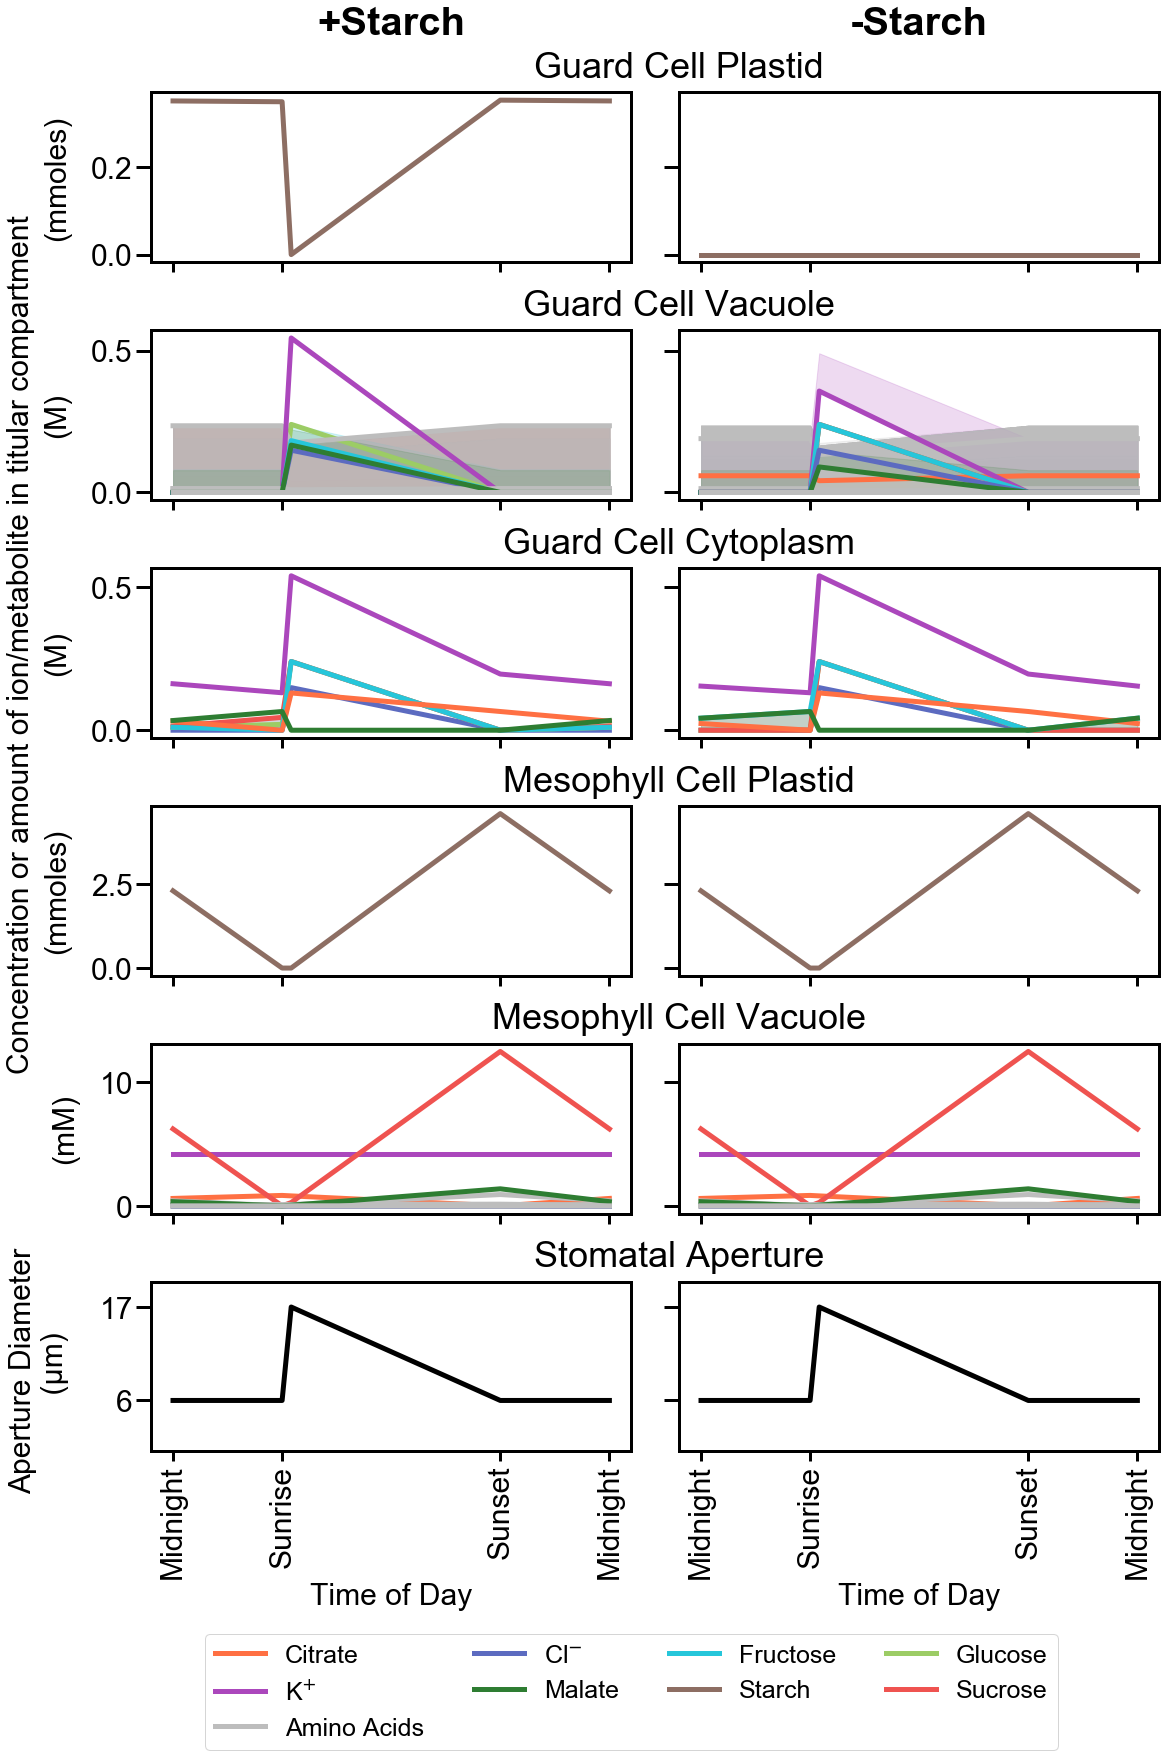

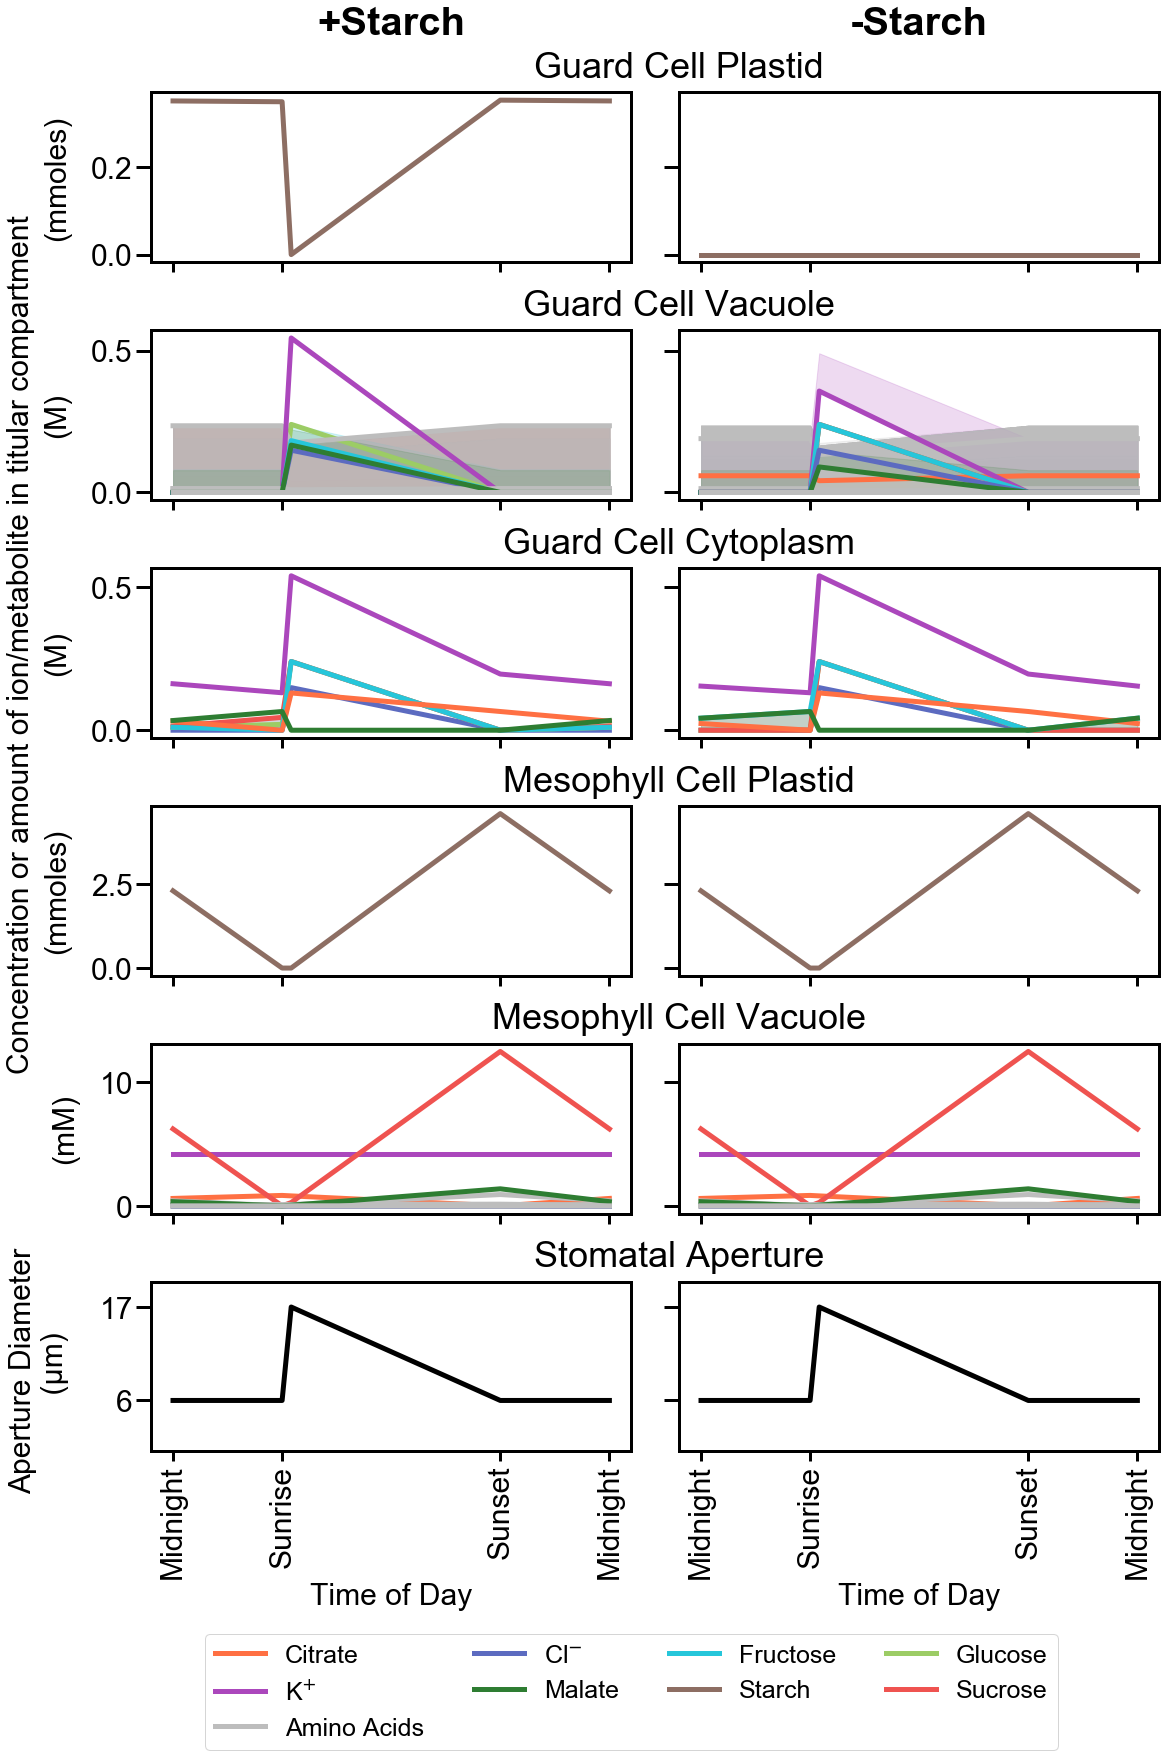

In [21]:
comparelinkers([realisticmodel, starchknockoutmodel], savelocation, name="figure4")

In [22]:
modelsolutionstocsv([realisticmodelnoaperture, realisticmodel, starchknockoutmodelnoaperture, starchknockoutmodel],["realisticmodelnoaperture", "realisticmodel", "starchknockoutmodelnoaperture", "starchknockoutmodel"], savelocation)

,Reaction Name,Equation,Compartment,realisticmodelnoaperture_pfba,realisticmodelnoaperture_max,realisticmodelnoaperture_min,realisticmodel_pfba,realisticmodel_max,realisticmodel_min,starchknockoutmodelnoaperture_pfba,starchknockoutmodelnoaperture_max,starchknockoutmodelnoaperture_min,starchknockoutmodel_pfba,starchknockoutmodel_max,starchknockoutmodel_min
Reaction ID,,,,,,,,,,,,,,,
EX_X_pi_t_me_1,EX_X_pi_t_me_1,X_pi_t_me_1 <=>,t_me_1,0.000000,NA,NA,0.000000e+00,NA,NA,0.000000,NA,NA,0.000000e+00,NA,NA
EX_X_pi_t_me_2,EX_X_pi_t_me_2,X_pi_t_me_2 <=>,t_me_2,0.000000,NA,NA,0.000000e+00,NA,NA,0.000000,NA,NA,0.000000e+00,NA,NA
EX_X_pi_t_me_3,EX_X_pi_t_me_3,X_pi_t_me_3 <=>,t_me_3,0.000000,NA,NA,0.000000e+00,NA,NA,0.000000,NA,NA,0.000000e+00,NA,NA
EX_X_pi_t_me_4,EX_X_pi_t_me_4,X_pi_t_me_4 <=>,t_me_4,0.000000,NA,NA,0.000000e+00,NA,NA,0.000000,NA,NA,0.000000e+00,NA,NA
EX_X_pi_t_gc_1,EX_X_pi_t_gc_1,X_pi_t_gc_1 <=>,t_gc_1,0.000000,NA,NA,0.000000e+00,NA,NA,0.000000,NA,NA,0.000000e+00,NA,NA
EX_X_pi_t_gc_2,EX_X_pi_t_gc_2,X_pi_t_gc_2 <=>,t_gc_2,0.000000,NA,NA,0.000000e+00,NA,NA,0.000000,NA,NA,0.000000e+00,NA,NA
EX_X_pi_t_gc_3,EX_X_pi_t_gc_3,X_pi_t_gc_3 <=>,t_gc_3,0.000000,NA,NA,0.000000e+00,NA,NA,0.000000,NA,NA,0.000000e+00,NA,NA
EX_X_pi_t_gc_4,EX_X_pi_t_gc_4,X_pi_t_gc_4 <=>,t_gc_4,0.000000,NA,NA,0.000000e+00,NA,NA,0.000000,NA,NA,0.000000e+00,NA,NA
EX_X_CO2_t_me_1,EX_X_CO2_t_me_1,X_CO2_t_me_1 <=>,t_me_1,3.043459,NA,NA,3.042675e+00,NA,NA,3.043459,NA,NA,3.042667e+00,NA,NA


## Investigating Differences in Linkers

In [23]:
for reaction in realisticmodel.reactions:
    if "gc_Linker_2" in reaction.id:
        if abs(reaction.flux-starchknockoutmodel.reactions.get_by_id(reaction.id).flux)>0.001:
               print reaction.id, reaction.flux, starchknockoutmodel.reactions.get_by_id(reaction.id).flux, starchknockoutmodel.reactions.get_by_id(reaction.id).flux-reaction.flux

SUCROSE_v_gc_Linker_2 0.0 0.2749248 0.2749248
aMAL_v_gc_Linker_2 0.0819445481818 0.0440979142943 -0.0378466338875
bHIS_v_gc_Linker_2 0.0 0.152648671164 0.152648671164
MAL_v_gc_Linker_2 0.191203945758 0.102895133353 -0.0883088124043
CIT_v_gc_Linker_2 0.0308836574074 0.0473073838223 0.0164237264149
LYS_v_gc_Linker_2 0.103377491919 0.0 -0.103377491919
K_v_gc_Linker_2 0.624079296 0.409615037304 -0.214464258696


In [24]:
comparedict = {}
for reaction in realisticmodel.reactions:
    if "gc_Linker_2" in reaction.id:
        comparedict[reaction.id] = (realisticmodel.reactions.get_by_id(reaction.id).flux, starchknockoutmodel.reactions.get_by_id(reaction.id).flux, realisticmodel.reactions.get_by_id(reaction.id).flux-starchknockoutmodel.reactions.get_by_id(reaction.id).flux)
comparedf = pd.DataFrame.from_dict(comparedict) 
comparedf = comparedf.transpose()

In [25]:
for reactionid, row in comparedf.iterrows():
    if row[2] > 0.0001:
        print reactionid + ": Level is " + str(round(row[2],3)) + ", " + str(round(row[0]/row[1]*100,0)) + "% higher in the realistic model"
        print "FVA minimum is " + str(round(realisticmodel.fva["minimum"][reactionid],3)) + "in +starch and " + str(round(starchknockoutmodel.fva["minimum"][reactionid],3)) + "in -starch"
    elif row[2] < -0.0001:
        print reactionid + ": Level is " + str(abs(round(row[2],3))) + ", " + str(round(100-(row[0]/row[1]*100),0)) + "% lower in the realistic model"
        print "FVA minimum is " + str(round(realisticmodel.fva["minimum"][reactionid],3)) + "in +starch and " + str(round(starchknockoutmodel.fva["minimum"][reactionid],3)) + "in -starch"

CIT_v_gc_Linker_2: Level is 0.016, 35.0% lower in the realistic model
FVA minimum is 0.0in +starch and 0.0in -starch
K_v_gc_Linker_2: Level is 0.214, 152.0% higher in the realistic model
FVA minimum is 0.624in +starch and 0.41in -starch


C:\Users\noahs\Anaconda2\lib\site-packages\ipykernel_launcher.py:3 RuntimeWarning: divide by zero encountered in double_scalars


LYS_v_gc_Linker_2: Level is 0.103, inf% higher in the realistic model
FVA minimum is -0.0in +starch and -0.0in -starch
MAL_v_gc_Linker_2: Level is 0.088, 186.0% higher in the realistic model
FVA minimum is 0.191in +starch and 0.103in -starch
SUCROSE_v_gc_Linker_2: Level is 0.275, 100.0% lower in the realistic model
FVA minimum is 0.0in +starch and 0.275in -starch
aMAL_v_gc_Linker_2: Level is 0.038, 186.0% higher in the realistic model
FVA minimum is 0.082in +starch and 0.044in -starch
bHIS_v_gc_Linker_2: Level is 0.153, 100.0% lower in the realistic model
FVA minimum is -0.0in +starch and 0.0in -starch


What is the difference between the level of sucrose and its upper bound in the vacuole of the starch knockout model?

In [26]:
starchknockoutmodel.reactions.SUCROSE_v_gc_Linker_2.flux - starchknockoutmodel.reactions.SUCROSE_v_gc_Linker_2.upper_bound

0.0